In [1]:
import numpy as np
import scipy.signal as ssgn
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import minmax_scale

# собственные утилиты с функциями визуализации 
import graphics_utility as gru

from pathlib import Path
import os

In [2]:
feature16_path = Path('../data/features_16')
feature32_path = Path('../data/features_32')

In [3]:
f16_path_dictionary = {}

for sub_path in feature16_path.iterdir():
    if False==sub_path.is_dir():
        continue
    f16_path_dictionary[sub_path.name] = {'mfcc': [], 'cq': [], 'wp': []}
    for item in sub_path.iterdir():
        if False== item.is_file() or item.suffix!='.npy':
            continue
        if '_mfcc' in item.stem:
            f16_path_dictionary[sub_path.name]['mfcc'].append(item.absolute())
        elif '_cq' in item.stem:
            f16_path_dictionary[sub_path.name]['cq'].append(item.absolute())
        elif '_wp' in item.stem:
            f16_path_dictionary[sub_path.name]['wp'].append(item.absolute())
        else:
            continue
    f16_path_dictionary[sub_path.name]['mfcc'].sort()
    f16_path_dictionary[sub_path.name]['cq'].sort()
    f16_path_dictionary[sub_path.name]['wp'].sort()

In [4]:
f32_path_dictionary = {}

for sub_path in feature32_path.iterdir():
    if False==sub_path.is_dir():
        continue
    f32_path_dictionary[sub_path.name] = {'mfcc': [], 'cq': [], 'wp': []}
    for item in sub_path.iterdir():
        if False== item.is_file() or item.suffix!='.npy':
            continue
        if '_mfcc' in item.stem:
            f32_path_dictionary[sub_path.name]['mfcc'].append(item.absolute())
        elif '_cq' in item.stem:
            f32_path_dictionary[sub_path.name]['cq'].append(item.absolute())
        elif '_wp' in item.stem:
            f32_path_dictionary[sub_path.name]['wp'].append(item.absolute())
        else:
            continue
    f32_path_dictionary[sub_path.name]['mfcc'].sort()
    f32_path_dictionary[sub_path.name]['cq'].sort()
    f32_path_dictionary[sub_path.name]['wp'].sort()            

In [5]:
import dtw  # одна из библиотек, реализующая алгоритм DTW
import tslearn # библиотека для работы с временными рядами

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [6]:
import tslearn.metrics as tsm
from tslearn.preprocessing import TimeSeriesScalerMinMax, TimeSeriesScalerMeanVariance, TimeSeriesResampler

In [7]:
mm_scaler = TimeSeriesScalerMinMax()
resampler = TimeSeriesResampler(32)

In [8]:
def ptp_scaler(x):
    if np.ptp(x) != 0:
        x -= np.min(x)
        x /= np.ptp(x)
    return x

#### Первый пример - команда "marvin".

In [9]:
wp_path1 = f16_path_dictionary['marvin']['wp'][0]
mfcc_path1 = f16_path_dictionary['marvin']['mfcc'][0]
cq_path1 = f16_path_dictionary['marvin']['cq'][0]
wp_envelopes1 = np.load(wp_path1)
mfcc1 = np.load(mfcc_path1)
cq1 = np.load(cq_path1)

#### Второй пример - команда "marvin".

In [10]:
wp_path2 = f16_path_dictionary['marvin']['wp'][2]
mfcc_path2 = f16_path_dictionary['marvin']['mfcc'][2]
cq_path2 = f16_path_dictionary['marvin']['cq'][2]
wp_envelopes2 = np.load(wp_path2)
mfcc2 = np.load(mfcc_path2)
cq2 = np.load(cq_path2)

#### "Построчное" сравнение первых четырёх огибающих вэйвлет-преобразования
#### двух произнесений команды "marvin".

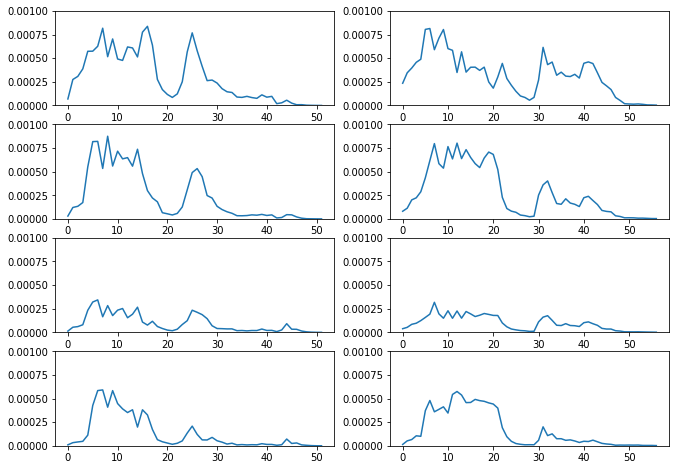

In [11]:
fig,ax = plt.subplots(4, 2, figsize=(11,8))

for i in range(4):
    ax[i][0].plot(wp_envelopes1[i])
    ax[i][0].set_ylim([0,1e-3])
    ax[i][1].plot(wp_envelopes2[i])
    ax[i][1].set_ylim([0,1e-3])

#### Третий пример - команда "seven".

In [12]:
wp_path3 = f16_path_dictionary['seven']['wp'][0]
mfcc_path3 = f16_path_dictionary['seven']['mfcc'][0]
cq_path3 = f16_path_dictionary['seven']['cq'][0]
wp_envelopes3 = np.load(wp_path3)
mfcc3 = np.load(mfcc_path3)
cq3 = np.load(cq_path3)

#### "Построчное" сравнение первых четырёх огибающих вэйвлет-преобразования
#### произнесений команд "marvin" и "seven".

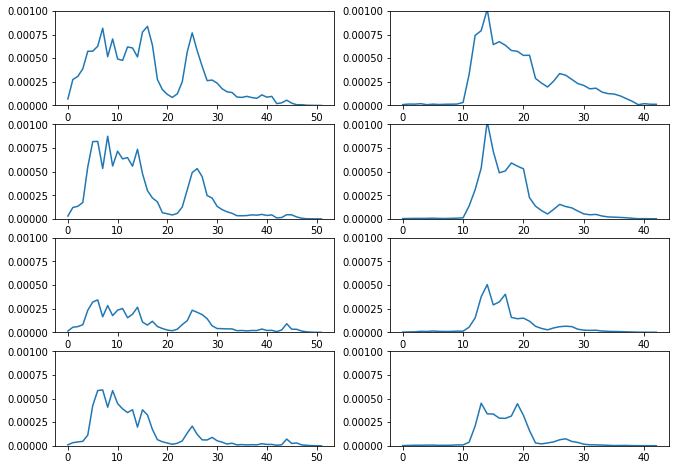

In [13]:
fig,ax = plt.subplots(4, 2, figsize=(11,8))

for i in range(4):
    ax[i][0].plot(wp_envelopes1[i])
    ax[i][0].set_ylim([0,1e-3])
    ax[i][1].plot(wp_envelopes3[i])
    ax[i][1].set_ylim([0,1e-3])

In [14]:
path, sim = tsm.dtw_path(wp_envelopes2[0], wp_envelopes1[0], global_constraint='sakoe_chiba')

In [15]:
warped_envelope1 = np.zeros(wp_envelopes2[0].size)
for pair in path:
    warped_envelope1[pair[0]] = wp_envelopes1[0][pair[1]]

#### Совмещённые с помощью DTW первые огибающие вэйвлет-преобразования
#### двух произнесений команды "marvin".

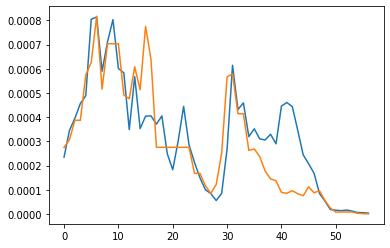

In [16]:
plt.plot(wp_envelopes2[0])
plt.plot(warped_envelope1)

#### Приведённые интерполяцией к одной длительности первые огибающие вэйвлет-преобразования
#### двух произнесений команды "marvin".

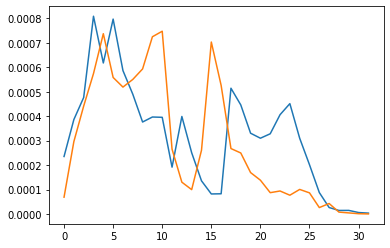

In [17]:
resampled2 = resampler.fit_transform(wp_envelopes2[0]).squeeze()
plt.plot(resampled2)
resampled1 = resampler.fit_transform(wp_envelopes1[0]).squeeze()
plt.plot(resampled1)

In [18]:
path, sim = tsm.dtw_path(wp_envelopes3[0], wp_envelopes1[0], global_constraint='sakoe_chiba')

In [19]:
warped_envelope2 = np.zeros(wp_envelopes3[0].size)
for pair in path:
    warped_envelope2[pair[0]] = wp_envelopes1[0][pair[1]]

#### Совмещённые с помощью DTW первые огибающие вэйвлет-преобразования
#### произнесений команд "marvin" и "seven".

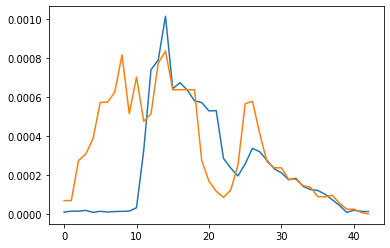

In [20]:
plt.plot(wp_envelopes3[0])
plt.plot(warped_envelope2)

#### Приведённые интерполяцией к одной длительности первые огибающие вэйвлет-преобразования
#### произнесений команд "marvin" и "seven".

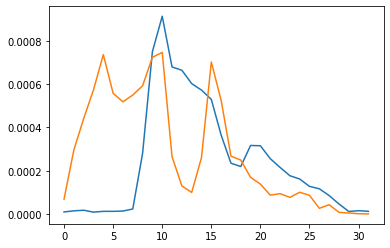

In [21]:
resampled3 = resampler.fit_transform(wp_envelopes3[0]).squeeze()
plt.plot(resampled3)
plt.plot(resampled1)

In [22]:
def mean_square(x, y):
    summ = 0
    for x_i, y_i in zip(x, y):
        summ += (x_i - y_i)**2
    return summ / len(x)

#### **Вычисление построчных дистанций между двумя матрицами параметров.**
#### Функция возвращает два списка значений мер близости:
#### 1) дистанции, определённые алгоритмом DTW (суммарная стоимость пути в матрице стоимости),
#### 2) среднеквадратические отклонения совмещённых с помощью DTW рядов. 

In [23]:
def get_row_wise_dtw_metrics(query, reference):
    assert(len(query)==len(reference))
    if len(query[0]) > len(reference[0]):
        query, reference = reference, query    
    distance_values = []
    mse_values = []
    n = len(query)
    for i in range(n):
        path, distance = tsm.dtw_path(query[i], reference[i], global_constraint='sakoe_chiba')
        distance_values.append(distance)
        warped_reference = np.zeros(len(query[i]))
        for pair in path:
            warped_reference[pair[0]] = reference[i][pair[1]]        
        mse_values.append(mean_square(query[i], warped_reference))        
    return distance_values, mse_values

#### Значения метрик для вэйвлет-огибающих двух произнесений "marvin"

In [24]:
wp_distances1, wp_mse1 = get_row_wise_dtw_metrics(wp_envelopes1, wp_envelopes2)

In [25]:
np.mean(wp_distances1)

0.00021736706922222894

In [26]:
np.mean(wp_mse1)

2.200309852121488e-09

#### Значения метрик для вэйвлет-огибающих произнесений "marvin" и "seven"

In [27]:
wp_distances2, wp_mse2 = get_row_wise_dtw_metrics(wp_envelopes1, wp_envelopes3)

In [28]:
np.mean(wp_distances2)

0.0005564683701647278

In [29]:
np.mean(wp_mse2)

1.5767374324049588e-08

#### Значения метрик для MFCC двух произнесений "marvin"

In [30]:
mfcc_distances1, mfcc_mse1 = get_row_wise_dtw_metrics(mfcc1, mfcc2)

In [31]:
np.mean(mfcc_distances1)

164.01820674603664

In [32]:
np.mean(mfcc_mse1)

580.7385580658251

#### Значения метрик для MFCC произнесений "marvin" и "seven"

In [33]:
mfcc_distances2, mfcc_mse2 = get_row_wise_dtw_metrics(mfcc1, mfcc3)

In [34]:
np.mean(mfcc_distances2)

189.4069006989225

In [35]:
np.mean(mfcc_mse2)

1102.7682577462824

#### Значения метрик для Constant-Q двух произнесений "marvin"

In [36]:
cq_distances1, cq_mse1 = get_row_wise_dtw_metrics(cq1, cq2)

In [37]:
np.mean(cq_distances1)

0.03035607344811933

In [38]:
np.mean(cq_mse1)

2.279316411307652e-05

#### Значения метрик для Constant-Q произнесений "marvin" и "seven"

In [39]:
cq_distances2, cq_mse2 = get_row_wise_dtw_metrics(cq1, cq3)

In [40]:
np.mean(cq_distances2)

0.04174382293405067

In [41]:
np.mean(cq_mse2)

5.699612355279859e-05

#### Приведённые выше простые примеры вычисления мер построчной близости между матрицами параметров
#### показывают, что обе метрики - mse и dtw distance - существенно отличаются в случаях
#### произнесений одного и того же слова и произнесений разных слов.
<br></br>
#### **Вычисление дистанций между двумерными временными рядами,**
#### **образованными колонками двух матриц параметров.**
#### Функция возвращает два значения мер близости:
#### 1) дистанция, определённая алгоритмом DTW (суммарная стоимость пути в матрице стоимости),
#### 2) среднеквадратическое отклонение совмещённых с помощью DTW рядов.

In [42]:
def get_column_wise_dtw_metrics(query, reference):    
    assert(len(query)==len(reference))
    if len(query[0]) > len(reference[0]):
        query, reference = reference, query        
    query = query.T
    reference = reference.T
    path, distance = tsm.dtw_path(query, reference, global_constraint='sakoe_chiba')    
    warped_reference = np.zeros(query.shape)
    for pair in path:
        warped_reference[pair[0]] = reference[pair[1]]        
    mse = np.linalg.norm(query - warped_reference) / len(query)
    return distance, mse

#### Значения метрик для вэйвлет-огибающих двух произнесений "marvin"

In [43]:
get_column_wise_dtw_metrics(wp_envelopes1, wp_envelopes2)

(0.0016978314216471403, 3.1115992026675585e-05)

#### Значения метрик для вэйвлет-огибающих произнесений "marvin" и "seven"

In [44]:
get_column_wise_dtw_metrics(wp_envelopes1, wp_envelopes3)

(0.003500153808167144, 7.84008143735629e-05)

#### Значения метрик для MFCC двух произнесений "marvin"

In [45]:
get_column_wise_dtw_metrics(mfcc1, mfcc2)

(871.4508254041881, 16.06901034664178)

#### Значения метрик для MFCC произнесений "marvin" и "seven"

In [46]:
get_column_wise_dtw_metrics(mfcc1, mfcc3)

(1131.5527512462195, 24.16896124848248)

#### Значения метрик для Constant-Q двух произнесений "marvin"

In [47]:
get_column_wise_dtw_metrics(cq1, cq2)

(0.1933600392100545, 0.0034484414131165323)

#### Значения метрик для Constant-Q произнесений "marvin" и "seven"

In [48]:
get_column_wise_dtw_metrics(cq1, cq3)

(0.23277366580847672, 0.005134058877032686)

#### Как и в случае построчного сравнения между матрицами параметров,
#### обе метрики - mse и dtw distance - существенно отличаются в случаях
#### произнесений одного и того же слова и произнесений разных слов.